# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

#### collect vast amounts of data on customers and clientele, and have a strong desire to understand the meaningful relationships hidden in their customer base.
 future products and services that best satisfy the demands or needs of their customers.
 Things you will learn by completing this project:

* How to apply preprocessing techniques such as feature scaling and outlier detection.
* How to interpret data points that have been scaled, transformed, or reduced from PCA.
* How to analyze PCA dimensions and construct a new feature space.
* How to optimally cluster a set of data to find hidden patterns in a dataset.
* How to assess information given by cluster data and use it in a meaningful way.

In [44]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [45]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [46]:
# Display a description of the dataset
desc = display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [47]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,62,301]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,7823,6245,6544,4154,4074,964
2,5283,13316,20399,1809,8752,172


In [48]:

samples2=samples.rename(index={0:"sample 0" ,1:"sample 1", 2:"sample 2"})
print "* sample points of wholesale customers dataset:"
display(samples2)

* sample points of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
sample 0,13265,1196,4221,6404,507,1788
sample 1,7823,6245,6544,4154,4074,964
sample 2,5283,13316,20399,1809,8752,172


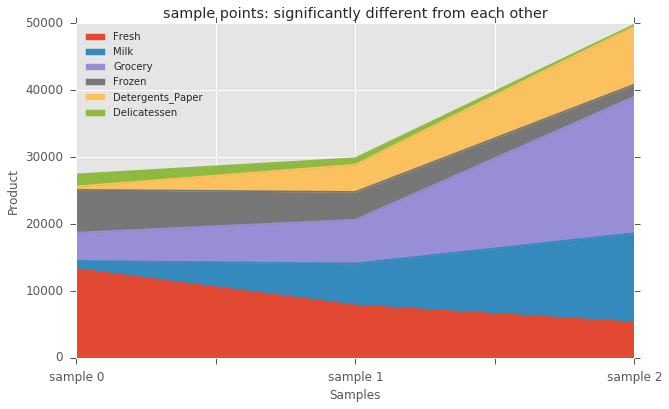

In [49]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df3 = pd.DataFrame(samples2, columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
ax = df3.plot(kind='area', title ="sample points: significantly different from each other",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("Samples",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()

In [50]:
data['total']=data['Fresh']+data['Milk']+data['Grocery']+data['Frozen']+data['Detergents_Paper']+data['Delicatessen']

In [51]:
print "average total purchase cost of all product category  by each cuntomer : ",data['total'].sum()/float(len(data['total']))

average total purchase cost of all product category  by each cuntomer :  33226.1363636


In [52]:
#sort item by it's total value
mydict={}
col_list = list(data.columns)
for i in range(len(col_list)-1):  #excluding last column, 'total' which I added 
    mydict[col_list[i]]=data[col_list[i]].sum()
# print mydict
import operator
sorted_mydict = sorted(mydict.items(), key = operator.itemgetter(1), reverse=True)
#sr=sorted_mydict.reverse()

#same as lambda vesion
#sorted(sorted_mydict.items(), key=lambda x: x[1])
print "*** sort item by it's total value ***\n", sorted_mydict

# print "Fresh",data['Fresh'].sum()," Milk",data['Milk'].sum()," Grocery",data['Grocery'].sum(),\
# " Frozen",data['Frozen'].sum()," Detergents_Paper",data['Detergents_Paper'].sum()," Delicatessen",data['Delicatessen'].sum()

*** sort item by it's total value ***
[('Fresh', 5280131L), ('Grocery', 3498562L), ('Milk', 2550357L), ('Frozen', 1351650L), ('Detergents_Paper', 1267857L), ('Delicatessen', 670943L)]


In [53]:
#feature name list(column list)
col_list = list(data.columns)
print col_list  
# average purchase cost of each item which calculated as sum of each column divided by the number of each column length
for i in range(len(col_list)):
    print "Average purchase cost of {0} is {1:.0f}  ".format(col_list[i],data[col_list[i]].sum()/float(len(data['Fresh'])))
print "*"*50  

# for j,k in zip([0,0,0],range(0,3)):
#     print "purchase cost of product {0} for customer {1} is {2}".format(col_list[j], k,data[col_list[j]][k])
      

# for j,k in zip(range(0,3),[0,0,0]):
#     print data[col_list[j]][k]  #df[['Column_name']][row_number]
#     #print data[col_list[j]]  #print each column with it's value
for m in range(len(col_list)-1):  #last total columns shoud not be shown by column length -1 
    for j,k in zip([0,0,0],range(0,3)):
        print "Customer{1}'s purchase cost of product {0} is {2}".format(col_list[m],k,  data[col_list[m]][k])
    print "-"*50

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'total']
Average purchase cost of Fresh is 12000  
Average purchase cost of Milk is 5796  
Average purchase cost of Grocery is 7951  
Average purchase cost of Frozen is 3072  
Average purchase cost of Detergents_Paper is 2881  
Average purchase cost of Delicatessen is 1525  
Average purchase cost of total is 33226  
**************************************************
Customer0's purchase cost of product Fresh is 12669
Customer1's purchase cost of product Fresh is 7057
Customer2's purchase cost of product Fresh is 6353
--------------------------------------------------
Customer0's purchase cost of product Milk is 9656
Customer1's purchase cost of product Milk is 9810
Customer2's purchase cost of product Milk is 8808
--------------------------------------------------
Customer0's purchase cost of product Grocery is 7561
Customer1's purchase cost of product Grocery is 9568
Customer2's purchase cost of product Grocery

Categrized cost-wise frequency : Fresh


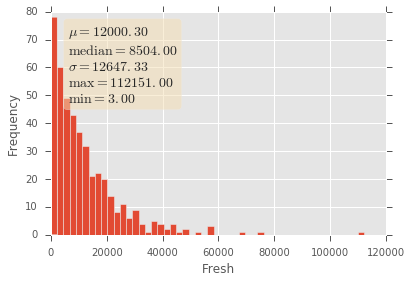

In [54]:
#test Fresh
# import numpy
# import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.style.use('ggplot')
print "Categrized cost-wise frequency : Fresh"
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Fresh']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Fresh')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Milk 


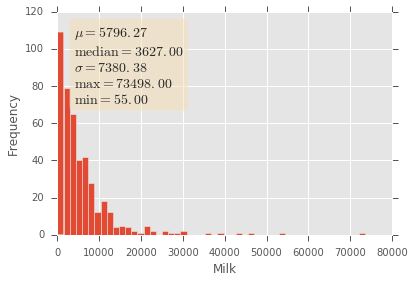

In [55]:
#test Milk
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Milk "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Milk']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Milk')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Grocery 


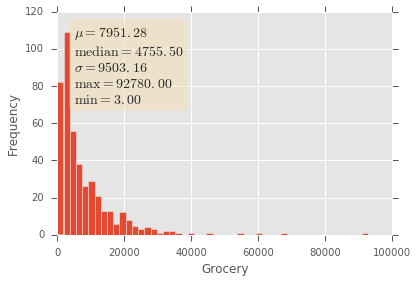

In [56]:
#test Grocery
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Grocery "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Grocery']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Grocery')
plt.ylabel('Frequency')
ax.hist(x, 50)
#ax.hist(x, len(data))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Grocery 


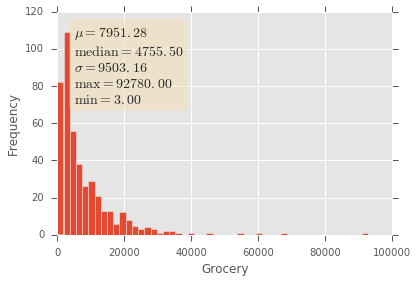

In [57]:
#test Grocery
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Grocery "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Grocery']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Grocery')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Frozen 


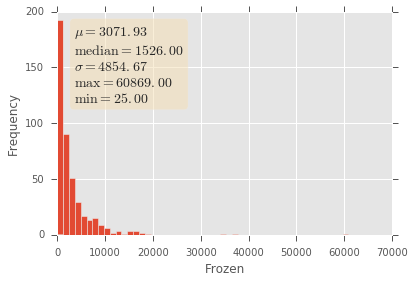

In [58]:
#test Frozen
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Frozen "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Frozen']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Frozen')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Detergents_Paper 


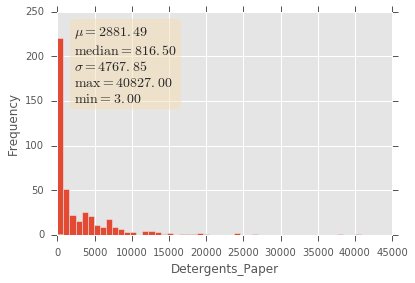

In [59]:
#test Detergents_Paper
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Detergents_Paper "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Detergents_Paper']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Detergents_Paper')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Categrized cost-wise frequency : Delicatessen 


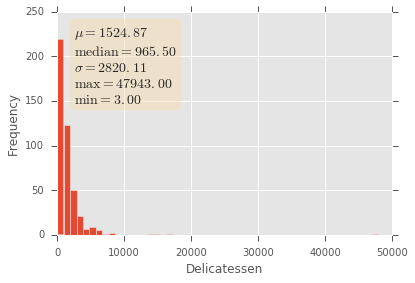

In [60]:
#test Delicatessen
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Delicatessen "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Delicatessen']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Delicatessen')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [61]:
display(samples - data.mean().round())

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,total
0,263.0,-2374.0,1265.0,3332.0,-3730.0,-4600.0,NaN
1,-561.0,1193.0,-4177.0,1082.0,-1407.0,449.0,NaN
2,-1353.0,5871.0,-6717.0,-1263.0,12448.0,7520.0,NaN


In [62]:
display(samples - data.median().round())

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,total
0,822.0,-309.0,4761.0,4878.0,-535.0,-2431.0,NaN
1,-2.0,3258.0,-681.0,2628.0,1788.0,2618.0,NaN
2,-794.0,7936.0,-3221.0,283.0,15643.0,9689.0,NaN


**Answer:**
Customer 0 has high spending pattern for Fresh , Frozen, Delicatessen comparing with mean and median of the corresponding items, I thinsk it could be chain Restaurant.

As for Customer 1,  it has high spending in relation to the category mean & median for Detergents_Paper, Frozen, and Milk, and low spending in relation to the category mean & median for Delicatessen, Fresh,  It could be a retailer.

As for Customer 2, it has high spending in relation to the category mean & median for Detergents_Paper, Grocery, and Milk. and low spending in relation to the category mean & median for Delicatessen, Fresh, It could be a Market.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [63]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,12669,9656,7561,214,2674,1338,34112
1,7057,9810,9568,1762,3293,1776,33266
2,6353,8808,7684,2405,3516,7844,36610
3,13265,1196,4221,6404,507,1788,27381
4,22615,5410,7198,3915,1777,5185,46100


In [64]:
## for just below cell excution purpose : 
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [65]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
target_label = data['Grocery']
new_data = data.drop('Grocery', axis=1)
#print new_data.head()
# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = train_test_split(data, new_data, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print "score of the prediction using the testing set:",score

score of the prediction using the testing set: 0.681884008544


In [66]:
# print new_data.head()
# print "*"*50
# print target_label[:5]

In [67]:
#test for feature data is new_data(data without removed column) and target data is DataFrame with removed column's value 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

col_list = list(data.columns)
for e in col_list:
    
#Fresh column is label   below drop is already excuted , so NO more duplicated drop , so block below code.
    target_label = data[e]
    new_data = data.drop(e, axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = train_test_split(data, new_data, test_size=0.25, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "score of the prediction using the testing set by removing feature {0} : {1} ".format(e,score)
    #initialize new_data and target_label
    new_data = []
    target_label = []

score of the prediction using the testing set by removing feature Fresh : -0.385749710204 
score of the prediction using the testing set by removing feature Milk : 0.156275395017 
score of the prediction using the testing set by removing feature Grocery : 0.681884008544 
score of the prediction using the testing set by removing feature Frozen : -0.210135890125 
score of the prediction using the testing set by removing feature Detergents_Paper : 0.271666980627 
score of the prediction using the testing set by removing feature Delicatessen : -2.2547115372 


In [68]:
# chosen column 'Grocery' to drop 
new_data = []
new_data = data.drop('Grocery',axis=1)
print new_data.head()  #chosen column 'Grocery' was removed
print "*"*60
print data.head()

   Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  8808    2405              3516          7844
3  13265  1196    6404               507          1788
4  22615  5410    3915              1777          5185
************************************************************
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I choosse feature 'Grocery' and prediction score, R score is 0.681884008544 which is the biggest of all features.
This feature is <span style="color:red">not necessary</span> to identify customers' behavior since value of feature, Grocery can be determined based on the values of the other features (ie, high R^2 score), then it means that we could still derive the value of Grocery even if it were not in the dataset. So we don't need feature, Grocery to identify customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

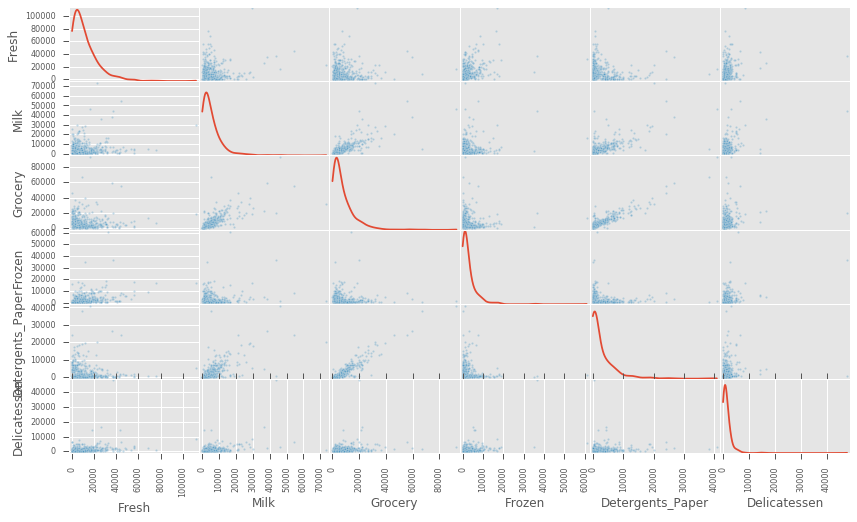

In [69]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Categrized cost-wise frequency : Fresh


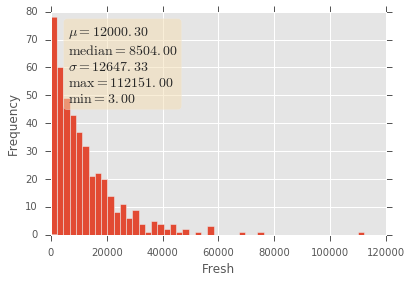

In [70]:
#test Fresh
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Fresh"
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Fresh']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Fresh')
plt.ylabel('Frequency')
ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 
Correlation score between Grocery and Detergents_paper is 0.924641, which is shy 1, means highest correlation among products. Grocery and Milk has 0.728335 correlation score which near 1, means high correlation between two items, and Delicatessen and Detergents_Paper has 0.069291 correlation score, which is third higest score.

It cofirms with my suspicions about the relevance of the feature, Grocery to predict since Grocery vs. Detergents, Grocery vs. Milk have the first and scond higest correlation score among products.

It is not nomally distributed. Most of data lie not in the middle of the graph but in far left part of the following graph.
As shown in the graph, mean is 7951 but median is 4755, which means most data lie in left of mean. and sigma(standard deviation) is a big number, 9503 which means data are not concentrated in the middle but highly spread out, mostly in left side of graph.

In [71]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


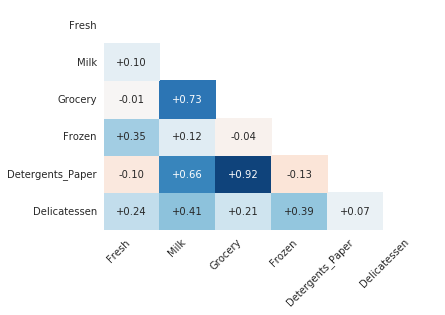

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)
    plt.xticks(rotation=45, ha='right');

Categrized cost-wise frequency : Grocery 


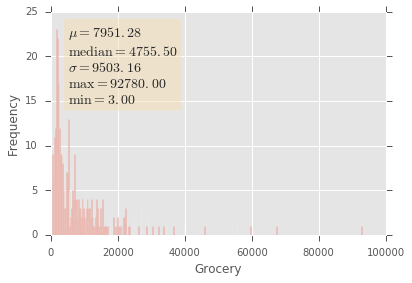

In [73]:
#test Grocery
import numpy
import matplotlib.pyplot as plt
print "Categrized cost-wise frequency : Grocery "
#test matplotlib 
#x=np.array(data['Fresh'])
x=data['Grocery']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
plt.xlabel('Grocery')
plt.ylabel('Frequency')
ax.hist(x, len(data))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

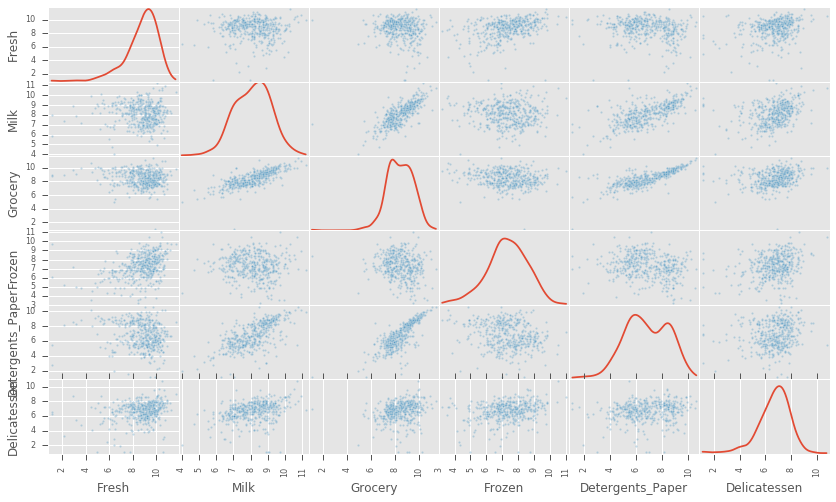

In [74]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

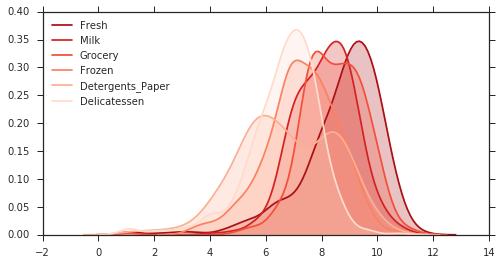

In [75]:
sns.set_style('ticks') ## specify plot style
# set color scheme
with sns.color_palette("Reds_r"):

    # plot densities of log-transformed data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc=2);

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [76]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.964823,8.739536,8.786304,8.331827,8.312381,6.871091
2,8.572249,9.496722,9.923241,7.500529,9.077038,5.147494


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [77]:
#changed the data to log_data : everything is based on log_data not data !!!
# For each feature find the data points with extreme high or low values
import numpy as np

for feature in log_data.keys() :    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    print "Q1:",Q1,"Q3:", Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# # OPTIONAL: Select the indices for data points you wish to remove
# outliers  = []

# # Remove the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Q1: 8.04805870221 Q3: 9.73706394795
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Q1: 7.33498124004 Q3: 8.88048008859
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Q1: 7.67461620137 Q3: 9.27385367724
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Q1: 6.60967774917 Q3: 8.17589608318
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Q1: 5.54810142479 Q3: 8.27434059875
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Q1: 6.01187465693 Q3: 7.50672842655
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [79]:
#find data points considered outliers for more than one feature
#append index of each outlier of items into total_index_list to calculate the frequency of outliers
total_index_list=[]
from collections import Counter
for feature in log_data.keys() :    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    print "Q1:",Q1,"Q3:", Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
#     'outlier'+str(feature) = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]  #error
    name = 'outlier_' + str(feature)
    name = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print name
    print "type(name):",type(name)
    
    #change numeric class to list
    index_list = list(name.index)
    print "index number of {0} is {1}".format(feature , index_list)
    print "*"*60
    total_index_list.append(index_list)
print "total index for outliers : ",total_index_list
print "shape of list : ", type(total_index_list)
print total_index_list

#ref : Making a flat list out of list of lists in Python
#[item for sublist in l for item in sublist]
print " \nlist out of nested list : ",[item for sublist in total_index_list for item in sublist]

#or itertools.chain(*nested_lst)
import itertools
merged = list(itertools.chain(*total_index_list))
print "itertools.chain(*total_index_list):",merged

#count oulier frequency
from collections import Counter
outlier_count = Counter(merged)
print outlier_count

#print  data points considered outliers for more than one feature
print "\n** Data points considered outliers for more than one feature:"
for outlier_index, count in outlier_count.most_common(len(outlier_count)):
    if count >=2:
        print "outlier : data point index {0} and it's freqency : {1}".format(outlier_index,count)


Q1: 8.04805870221 Q3: 9.73706394795
Data points considered outliers for the feature 'Fresh':
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361    

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Data points considered outliers for more than one feature:
outlier : data point index 154 and it's freqency : 3
outlier : data point index 128 and it's freqency : 2
outlier : data point index 65 and it's freqency : 2
outlier : data point index 66 and it's freqency : 2
outlier : data point index 75 and it's freqency : 2

These data points could be removed from the dataset since data points are detected as outliers either because
they are the points of interest (known as anomaly detection) or because they could be a hinderance to the classification.

Even though these data points consider outliers for more than one feature could cause discrimination of classification, 
We<span style="color:red"> don't need to remove outliers</span> since In many cases, there is a valid reason for these observations to be outliers.

* In this case, data points are not normally distributed but The feature distributions appear to be skewed right/positive, or lognormal, with a mean greater than the median,So if we remove outliers for better performance, the distibutions of data may be more normalized but it is different from the nature of data set of this case. So removing outlier may do little for getting better results.

* Another issue with outliers is where to draw the line. It may not be clear where the outlier behavior starts. There are some people who arbitrarily eliminate a percentage at the tails (in this case 25%), which could not guarantee the optimized boundary for outliers.

* Number of data points is 440, which is not big number, So removing data points coulb be problematic to the contrary of our intentions.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover <span style="color:red">which dimensions about the data best maximize the variance of features involved</span>. In addition to finding these dimensions, PCA will also report the <span style="color:red">*explained variance ratio*</span> of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA(copy=True, n_components=6, whiten=False)


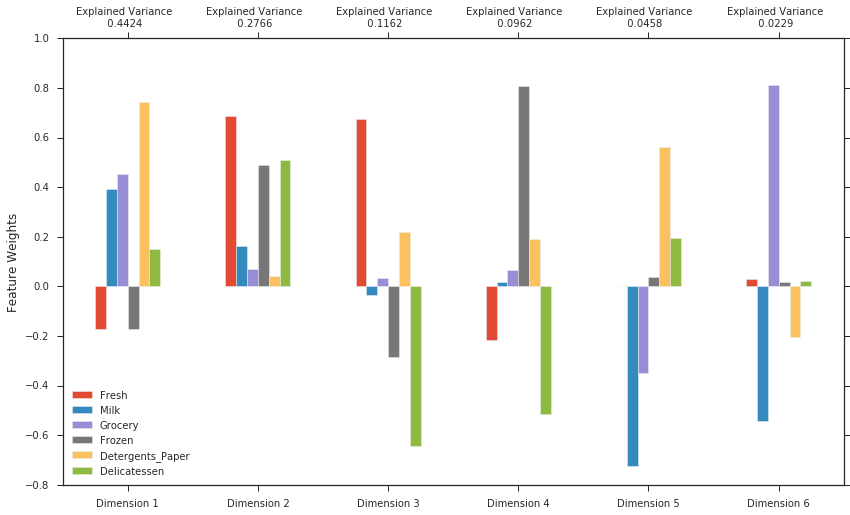

In [84]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components = 6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)
print pca
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [85]:
print "cumulative variance for dimensions"
print pca_results['Explained Variance'].cumsum()

cumulative variance for dimensions
Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.


**Answer:**

(1) First and second dimension:

With dimension 1, we can cumulative variance of this dimension as 0.4424 which is highest variance(minimizing information loss) among all dimensions and the data is most spread out, in which we can see the cusmomer's spending pattern such as customer's high spending on ditergent, grocery, milk. 

* And together with dimension 1(customer's high spending on ditergent, grocery, milk) and dimesion 2( variance:0.2766, customer's high sepeding pattern on fresh, frozen, delicatessen. second highest variance among dimensions), we see cumulative variance of 0.7190 which is bigger than dimension 1 alone.
With dimension 1 and dimension 2, we can see more variance of data, in which we can see more diverse and various customer's spending behavior.


(2) First 4 dimension: 

In cumulative variance of dimension 1 only, varnace of 0.4424  shows customer's high spending on ditergent , grocery, milk

   Cumulative variance of 0.7190 with dimension 1(high spending on ditergent , grocery ,milk) and dimension2
   ( high spending fresh, frozen, decatessen) shows more variant of data.
   
   Cumulative variance of 0.8352 consits of dimension 1(variance 0.4424,high spending on ditergent, grocery, milk), dimension
   2(0.2766,high sepeding pattern on fresh, frozen, delicatessen), dimension 3(0.1162 high spending on fresh, detergent_paper,
   which is positively correlated to variance value, but delicatessen is negatively correlated to the variance value)
   
   * cumulative variance of 0.9314 consists of dimension 1(variance 0.4424,high spending on ditergent, grocery, milk), dimension
   2(0.2766,high sepeding pattern on fresh, frozen, delicatessen), dimension 3(0.1162 high spending on fresh, detergent_paper,
   which is positively correlated to variance value, but delicatessen is negatively correlated to the variance value)
   and dimemsion 4(0.0962 high spending on frozen, detergent which is positively correlated to variance value. but delicatessen is negatively correlated.)
   
   As cumulative variance is increase according to dimensions added,  we can see more variance of data, in which we can see more diverse and various customer's spending behavior. but As dimension is reduced , we see less variance of data.

*******************************************************************************************************************************
1) How much variance in the data is explained in total by the first and second principal component?

In order to discover which dimensions about the data best maximize the variance of features involved, I need to check how much variance within the data is explained by that dimension alone. 
 So, first principal component(dimensioin 1) has the highest explained variance, 0.4424 which is the highest variance(minimizing information loss) and the data is most spread out. And then second principal component(dimension 2) has second highest variance and second most spread out.  
 
    In Dimensioin 1(first principal compnent), item 'Detergent_Paper' with the first higest positive weight score is mostly correlated with first compoent and this tells the customer's behavior more effectively than any other items.
Second high weighted item 'Grocery' and third high weighted item, Milk are also positively correlated with the first principal component and eventually can be a efficient indicator of customer's purchase pattern of itmes. But negative weighted itmes such as fresh and frozen are negatively correlated with the variance of principal components. 

    In Dimension 2(second principal component), all items have positive weights and customer's  spending behavior is correlated (in proportion) to the features that have positive weights. Especially , Fresh , Delicatessen, Frozen have the high positive feature weight. so these 3 items have a huge impact on customer's purchase pattern positively.
    
Total varinace of principal components in dimension 1 is higher than that of any other dimensions, also dimension 2 has the second highest variance. So, dimension 1 and 2 has the high total variance. In other words,  a customer who have a high PCA value such as dimension 1 or 2, have a tendency to  spend  as correlated (in proportion) to the features that have positive weights.

* First principal component : customer purchase behavior pattern - 3 features positively correlated with each other(Detergent_Paper, Grocery, Milk), patttern is as follows : if Detergent purchased, and then Grocery, milk should be purchased but Fresh and Frozen should not be purchase accordingly since they are negative weight.) 

* Second principal component : customer purchase behavior pattern -  3 features correlated with each other(Fresh,Frozen,Deli),     So, purchase pattern is if a customer buy Deli he also should buys many Fresh and Frozen.



2) What about the first four principal components? 
   *As for component 3, 4,  pattern for customer  spending is far less correlated (in proportion) to the features comparing
   first and second principal component. And principal compoent 3 and 4 has lower variance comparing with principal 1 and 2.
   
   Customer's spending behavior is correlated to the features that have positive weights and negatively correlated to negative
   feature weights. 
   
   So, in principal component 3, high positive weight Fresh and detergent are correlated with
   customer's spending behavior positively. but Delicatessen with big negative weight will be negatively correlated with the  
   customer's spending pattern of this item.
   
   Principal component 4 has one high positive weight item(Frozen) and small positve weight(Ditergent_Papers, Grocery) but 
   two high negative weight(Delicatessen, Fresh), which result in negative correlation with the variance of features
   involved. Customer purchase pattern is if Frozen purchsed,  Delicatessen should not be purchased.
   




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [410]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1273,1.4580,-0.5247,0.4620,0.6799,0.6652
1,1.3514,0.9564,0.0553,0.9985,0.3713,-0.3344
2,2.6905,-0.3626,1.3172,1.5303,-0.5074,-0.0404


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [411]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)
print "good_data\n",good_data.head()
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)
print "After PCA dimension reduction : redeced_data befor DataFrame()\n",reduced_data[:5]
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

good_data
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525
After PCA dimension reduction : redeced_data befor DataFrame()
[[ 1.75098532  0.07051523]
 [ 1.80036534  0.86975357]
 [ 1.89373597  1.67662072]
 [-1.12731297  1.45798229]
 [ 0.79671147  2.46086569]]


In [412]:
good_data.head()  #dimension 6,  reduced_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [413]:
reduced_data.head()  #after DataFrame(reduced_data)  #not sample data but original reduced_data made of good_data

,Dimension 1,Dimension 2
0,1.750985,0.070515
1,1.800365,0.869754
2,1.893736,1.676621
3,-1.127313,1.457982
4,0.796711,2.460866


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [414]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))   #for sample data

,Dimension 1,Dimension 2
0,-1.1273,1.4580
1,1.3514,0.9564
2,2.6905,-0.3626


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 

Advantage of Kmeans

1) Fast, robust and easier to understand.

2) Relatively efficient: O(tknd), where n is number of objects, k is number of clusters, d is number of dimension of each object, and t  is number of iterations. Normally, k, t, d << n.

3) Gives best result when data set are distinct or well separated from each other.


Advantage of Gaussian Mixture Model : Kmeans has some failure in such area as  a diparate cluster size, overlapping size and 
different shpaped / oriented clusters. Whereas Gausian Mixture Model has advantage over these area and it's the fastest algorithm for learning mixture models

1) Provides soft assignments of observations to clusters (uncertainty in assignment) such as probability .
   e.g., 54% chance document is world news, 45% science, 1% sports, and 0% entertainment

2) Accounts for cluster shapes not just centers

3) Enables learning weightings of dimensions
  e.g., how much to weight each word in the vocabulary when computing cluster assignment

As for these wholesale customer data, Gaussian Mixture Model clustering algorithm is suitable to use.
KMeans are suitable when each cluster has the same variance and each feature is independent of the other features. But As for this wholesale customer data, it has little chance of clustering of same variance and same shape and further clusters may be overlapped in some areas.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [415]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
clusterer = GMM(n_components=3).fit(reduced_data)
#clusterer = GMM(n_components=3).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
#print "preds:\n",preds
# TODO: Find the cluster centers
centers = clusterer.means_
print "cluster centers :\n",centers
# TODO: Predict the cluster for each transformed sample data point
print "pca_samples\n",pca_samples
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print "score :",score

cluster centers :
[[-1.53363413  0.28330999]
 [ 1.5386388   0.35627413]
 [-0.43634807 -1.48457988]]
pca_samples
[[-1.12731297  1.45798229]
 [ 1.35139143  0.95638554]
 [ 2.6904953  -0.36263561]]
score : 0.375222595239


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [416]:
reduced_data[:5]

,Dimension 1,Dimension 2
0,1.750985,0.070515
1,1.800365,0.869754
2,1.893736,1.676621
3,-1.127313,1.457982
4,0.796711,2.460866


In [417]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
component=[2,3,4,5,6]
for each in component: 
    clusterer = GMM(n_components=each,random_state=42).fit(reduced_data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
#print "preds:\n",preds
# TODO: Find the cluster centers
    centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print "score for number of component:{} is {}".format(each,score)

score for number of component:2 is 0.316017379116
score for number of component:3 is 0.375222595239
score for number of component:4 is 0.356401755466
score for number of component:5 is 0.245906728384
score for number of component:6 is 0.272433910327


**Answer:** cluster number 3 has the best sillhouette score , 0.375222595239

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [418]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
clusterer = GMM(n_components=3,random_state=42).fit(reduced_data)
#clusterer = GMM(n_components=3).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
#print "preds:\n",preds
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print "score :",score

score : 0.375222595239


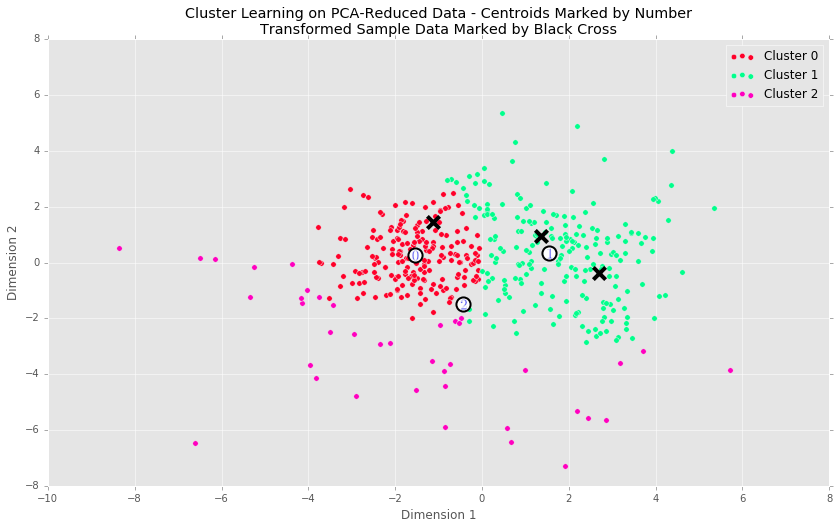

In [419]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)  #with sample data(pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the <span style="color:red">representative customer spending</span> from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [339]:
# TODO: Inverse transform the centers
print "centers:\n",centers
log_centers = pca.inverse_transform(centers)
print "log_centers:\n",log_centers
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
print "true_centers:\n",true_centers
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]  #len(centers) : number of row in DataFrame centers
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print type(true_centers)



centers:
[[-1.53363413  0.28330999]
 [ 1.5386388   0.35627413]
 [-0.43634807 -1.48457988]]
log_centers:
[[ 9.19106821  7.56209448  7.76399697  7.70364918  5.65449883  6.58035909]
 [ 8.7073524   8.78584179  9.16498827  7.21019993  7.94798228  7.0766565 ]
 [ 7.78920645  7.70782922  8.13990929  6.6525169   6.39844686  5.84322378]]
true_centers:
[[ 9809.1235714   1923.8708138   2354.29586984  2216.42136444
    285.57332504   720.79811433]
 [ 6047.21065274  6540.97682297  9556.60933519  1353.16277824
   2829.85931602  1184.00318097]
 [ 2414.4008654   2225.70550045  3428.60684105   774.73179525
    600.91101542   344.88939791]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9809.0,1924.0,2354.0,2216.0,286.0,721.0
Segment 1,6047.0,6541.0,9557.0,1353.0,2830.0,1184.0
Segment 2,2414.0,2226.0,3429.0,775.0,601.0,345.0


<class 'pandas.core.frame.DataFrame'>


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [340]:
# TODO: Inverse transform the centers
#print "centers:\n",centers
log_centers = pca.inverse_transform(centers)
#print "log_centers:\n",log_centers
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
#print "true_centers:\n",true_centers
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]  #len(centers) : number of row in DataFrame centers
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print "Fresh: total purchase cost :",true_centers['Fresh'].sum(),", average purchase cost per segment:",\
true_centers['Fresh'].sum()/3
print "Milk: total purchase cost :",true_centers['Milk'].sum(),", average purchase cost per segment:",\
true_centers['Milk'].sum()/3
print "Grocery: total purchase cost :",true_centers['Grocery'].sum(),", average purchase cost per segment:",\
true_centers['Grocery'].sum()/3
print "Frozen: total purchase cost :",true_centers['Frozen'].sum(),", average purchase cost per segment:",\
true_centers['Frozen'].sum()/3
print "Detergents_Paper: total purchase cost :",true_centers['Detergents_Paper'].sum(),", average purchase cost per segment:",\
true_centers['Detergents_Paper'].sum()/3
print "Delicatessen: total purchase cost :",true_centers['Delicatessen'].sum(),", average purchase cost per segment:",\
true_centers['Delicatessen'].sum()/3
print "*"*60
print "total purchase cost for Segment 0:",true_centers.iloc[0].sum()
print "total purchase cost for Segment 1:",true_centers.iloc[1].sum()
print "total purchase cost for Segment 2:",true_centers.iloc[2].sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9809.0,1924.0,2354.0,2216.0,286.0,721.0
Segment 1,6047.0,6541.0,9557.0,1353.0,2830.0,1184.0
Segment 2,2414.0,2226.0,3429.0,775.0,601.0,345.0


Fresh: total purchase cost : 18270.0 , average purchase cost per segment: 6090.0
Milk: total purchase cost : 10691.0 , average purchase cost per segment: 3563.66666667
Grocery: total purchase cost : 15340.0 , average purchase cost per segment: 5113.33333333
Frozen: total purchase cost : 4344.0 , average purchase cost per segment: 1448.0
Detergents_Paper: total purchase cost : 3717.0 , average purchase cost per segment: 1239.0
Delicatessen: total purchase cost : 2250.0 , average purchase cost per segment: 750.0
************************************************************
total purchase cost for Segment 0: 17310.0
total purchase cost for Segment 1: 27512.0
total purchase cost for Segment 2: 9790.0


In [341]:
#make copy version of true_centers
true_centers_updated=true_centers.copy()

In [342]:
#'total' column append to the copied true_centers version.
true_centers_updated['total']= true_centers_updated.apply(lambda x: x['Fresh']+x['Milk']+x['Grocery']+x['Frozen']+x['Detergents_Paper']+x['Delicatessen'],axis=1)

In [343]:
#sum up each products and assign it 'Sgement total
true_centers_updated.loc['Segment total']=true_centers.sum()

In [344]:
true_centers_updated.loc['average per Segment']=true_centers_updated.loc['Segment total']/3
true_centers_updated.index.name="Segment"
true_centers_updated

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Segment,,,,,,,
Segment 0,9809.0,1924.000000,2354.000000,2216.0,286.0,721.0,17310.0
Segment 1,6047.0,6541.000000,9557.000000,1353.0,2830.0,1184.0,27512.0
Segment 2,2414.0,2226.000000,3429.000000,775.0,601.0,345.0,9790.0
Segment total,18270.0,10691.000000,15340.000000,4344.0,3717.0,2250.0,NaN
average per Segment,6090.0,3563.666667,5113.333333,1448.0,1239.0,750.0,NaN


* average per segment is segment total devided by 3


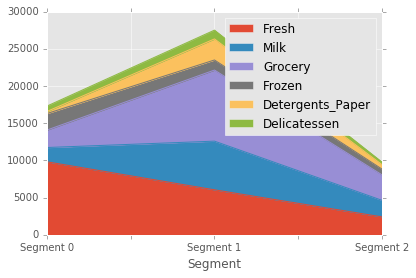

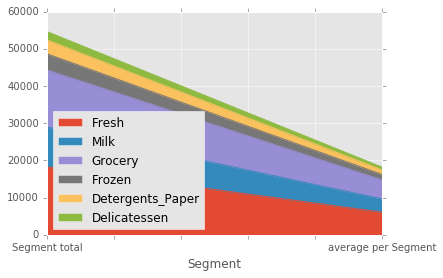

In [345]:
df = pd.DataFrame(true_centers_updated[0:3], columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
df.plot.area();
df = pd.DataFrame(true_centers_updated[3:5], columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
df.plot.area();
print "* average per segment is segment total devided by 3"

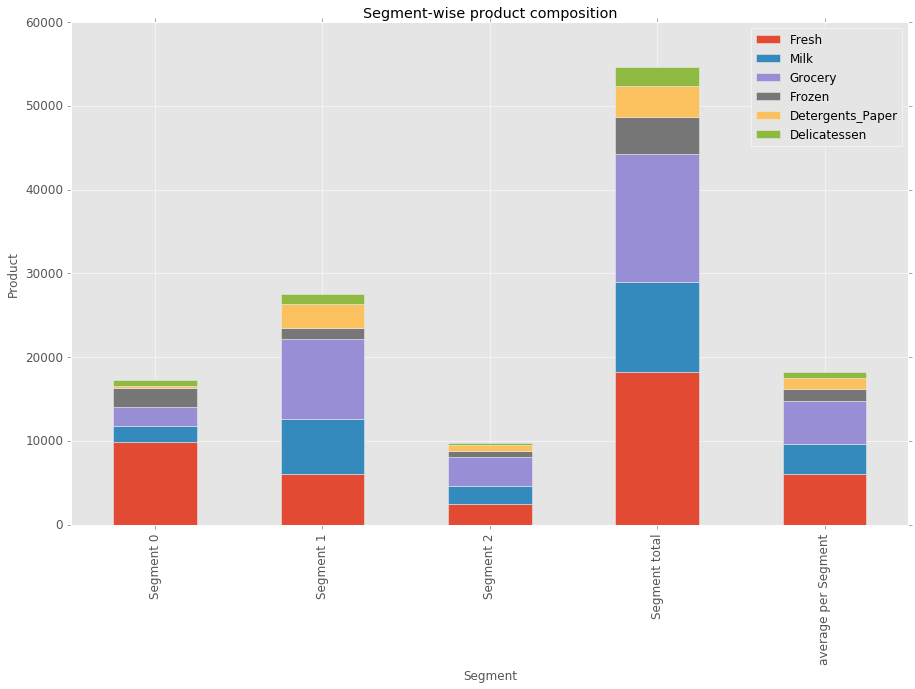

* average per segment is segment total devided by 3


In [346]:
df1 = pd.DataFrame(true_centers_updated[0:5], columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
ax = df1.plot(kind='bar', title ="Segment-wise product composition",figsize=(15,9),legend=True, fontsize=12,stacked=True)
ax.set_xlabel("Segment",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()
print "* average per segment is segment total devided by 3"

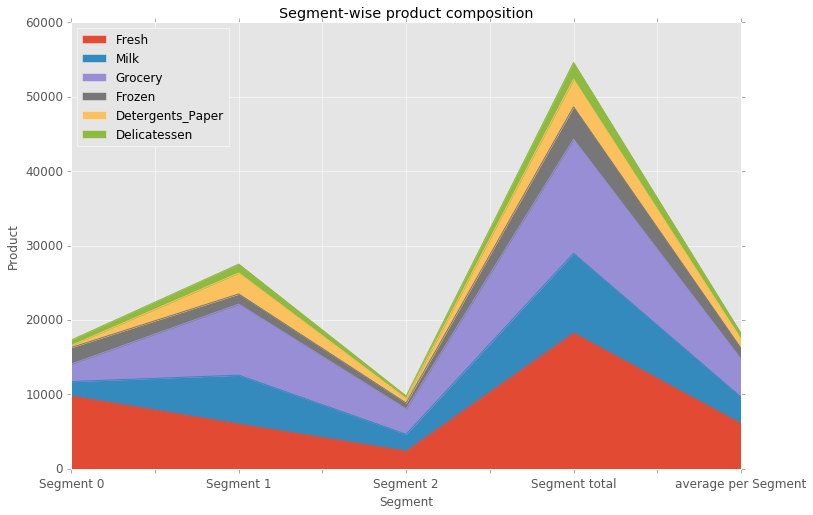

In [347]:
df2 = pd.DataFrame(true_centers_updated[0:5], columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])

#df1 = pd.DataFrame(true_centers_updated.loc[['Segment 0','Segment 1','Segment 2','average per Segment'],['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen']])
ax = df2.plot(kind='area', title ="Segment-wise product composition",figsize=(12,8),legend=True, fontsize=12)
ax.set_xlabel("Segment",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()

In [348]:
#sort item by it's total value
mydict={}
col_list = list(data.columns)
for i in range(len(col_list)):  
    mydict[col_list[i]]=data[col_list[i]].sum()
#print mydict
import operator
sorted_mydict = sorted(mydict.items(), key = operator.itemgetter(1), reverse=True)
#sr=sorted_mydict.reverse()

#same as lambda vesion
#sorted(sorted_mydict.items(), key=lambda x: x[1])
print "sort item by it's total purchase cost\n", sorted_mydict

sort item by it's total purchase cost
[('Fresh', 5280131L), ('Grocery', 3498562L), ('Milk', 2550357L), ('Frozen', 1351650L), ('Detergents_Paper', 1267857L), ('Delicatessen', 670943L)]


In [349]:
desc = display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
 
 Each segment shows the representative customer spending practice from data points.

For example, in Segment 1, average customer's practice of spending cost(usd9557) for Grocery is the highest among Grocery of all segments and higher than median of Grocery(USD 4755). Also average customer's practice of spending cost(6541.0) for Milk is the highest of all segments and higher than median of milk(3627). Taking above facts into the consideration, If a customer who is assigned to Segment1(cluster 1) buy Grocery , he should buy Milk according this representative customer spending practice.

And for segment 0 , average customer's practice of spending cost(9809.0) for Fresh is the highest among three segments and higher than median(8504) of Fresh but Milk spending cost(1924) is the lowest among three segments and lower than median of milk(3627). So, in segment 0, Fresh and Milk are negatively correlated, if a customer buy a Fresh, he should not buy Milk.

* Following chart shows what set of establishments each of the customer segments represent.
I can consider each segment as follows according to it's characteristics.
Segment 0 : Restuarant/Hotel/Cafe,
Segment 1 : Retail,
Segment 2 : Market.

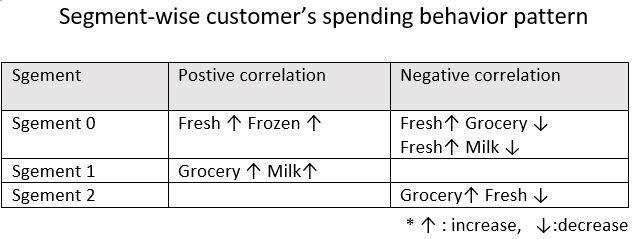

In [420]:
from IPython.display import Image
Image("segment.jpg")

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [421]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [422]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,1,2]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples2=samples.rename(index={0:"sample 0" ,1:"sample 1", 2:"sample 2"})
print "* sample points of wholesale customers dataset:"
display(samples2)

* sample points of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
sample 0,12669,9656,7561,214,2674,1338
sample 1,7057,9810,9568,1762,3293,1776
sample 2,6353,8808,7684,2405,3516,7844


In [423]:
print "Segment-wise average customer spending cost per product : "
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]  #len(centers) : number of row in DataFrame centers
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


Segment-wise average customer spending cost per product : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9809.0,1924.0,2354.0,2216.0,286.0,721.0
Segment 1,6047.0,6541.0,9557.0,1353.0,2830.0,1184.0
Segment 2,2414.0,2226.0,3429.0,775.0,601.0,345.0


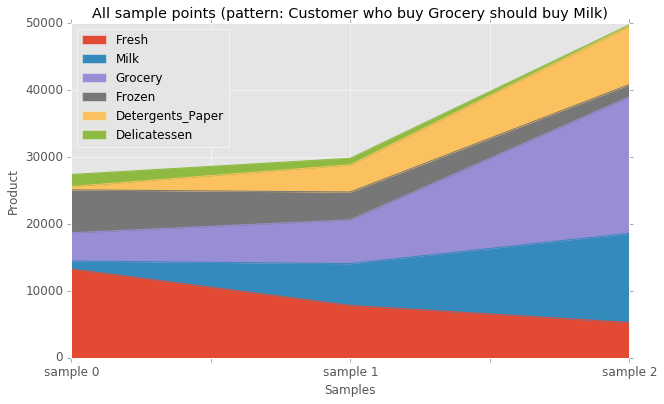

In [424]:
#using df3 DataFrame of sample data
ax = df3.plot(kind='area', title ="All sample points (pattern: Customer who buy Grocery should buy Milk)",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("Samples",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()

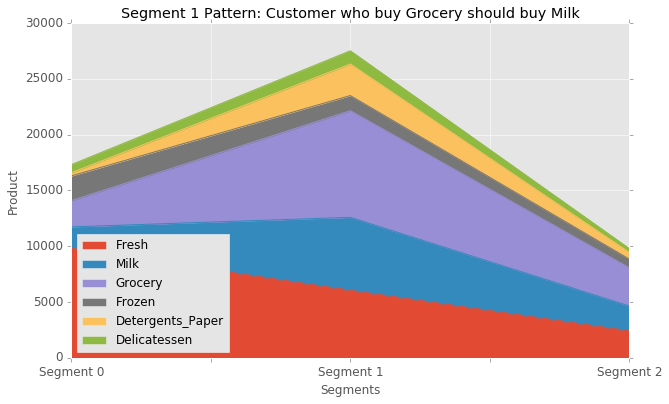

In [425]:
df2 = pd.DataFrame(true_centers, columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
ax = df2.plot(kind='area', title ="Segment 1 Pattern: Customer who buy Grocery should buy Milk",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("Segments",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()

**Answer:**
Customer segment 1  represents best for sample point 1 and 2.
From each sample data 1 and 2, customer who buy Grocery , should buy Milk since according to customer's speding behavior, which accord with the customer's speding behavior in Segment 1(average customer's spending behavior pattern of high Grocery spending cost(9557) and high Milk spending cost(6541))
It's also consistent with the outcom in above graph since all three sample data marked by black cross are in the cluster 1.

Customer segment 0 represents best for sample point 0.
Sample point 0 represent the customer's spending behavior of the positive correlationship between Fresh and Frozen and the negative correlationship between Fresh and Grocery, which is corresponding with segment 0's customer behavior pattern of high Fresh spending cost, high Frozen cost but low Grocery cost.

As shown in above sample points chart,
* customer 0 spent for high cost of Fresh( USD9809 ) and high cost of Frozen(2216) but low cost of Grocery(2354) 
* customer 1 spent for high cost(9557) of Grocery ,high cost of Milk(9568)
* customer 2 spent for high cost(8808) of Grocery ,high cost of Milk(7684)


## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change affects customer's behavior pattern differently according to the segments.
From above facts, We found  that customer's purchase pattern is different according the segment he belongs and a customer in a different segment responds differently for the change .So we can not assume the change affect all customers equally.

In Segment 1, the customer purachase pattern is 'If he buy Grocery, he shoud buy Milk. but customer in segment 0, If a customer buy Fresh, he should not buy Grocery or Milk. In segment 2 , I customer buy Grocery , he should not buy Fresh. So Change in one product can be a postive or negative impact depending on which segment the customer's behaviour pattern belongs.  


So, First of all, Customers are splited into two group. Group A is the category where Grocery devery time is reduced to 3 days from 5. and As for group B, the devlivery service time is still 5 days.

And then, Launch the changed delivery time service for Grocery from 5 days to 3 days for group A, and then check if there is a significant  Milk spending cost increased in group A(reduced delivery time) comparing with that of group B(not changed delivery time) since Grocery spending and Milk spnding are positively correlated.
After comparing with the spnding cost of Milk between category A and category B, the noticiable increase in Milk spending in category A, we can regard that the change in delivery service affects its customers positively. 


In segment 0 is the same logic with segment. First,  Split to group A(changed delivery service for "Fresh" ) and group B(unchanged delivery service for "Fresh") and check whether Frozen spending cost is increased for group A comparing with group B while Fresh is increased(two items are postively correlated). if so, we can consider it has postive effect.
but as for group A with products pair of Fresh and Grocery(negatively correlated), if Grocery spending cost is increased according to Fresh spending cost increase, we can consider it affect negatively since it is againse to the customer's speding patter of the positve correlation between Fresh and Grocery .

Segment 1 is same with above logic with segment 0 and segment 1,but check point is the behavior pattern  based on negative correlationship betweeen Grocery and Fresh.  

#### Answer: In case of customer in Segment 1 , A/B test  for Grocery & Milk:  Double click below image for the detail view !

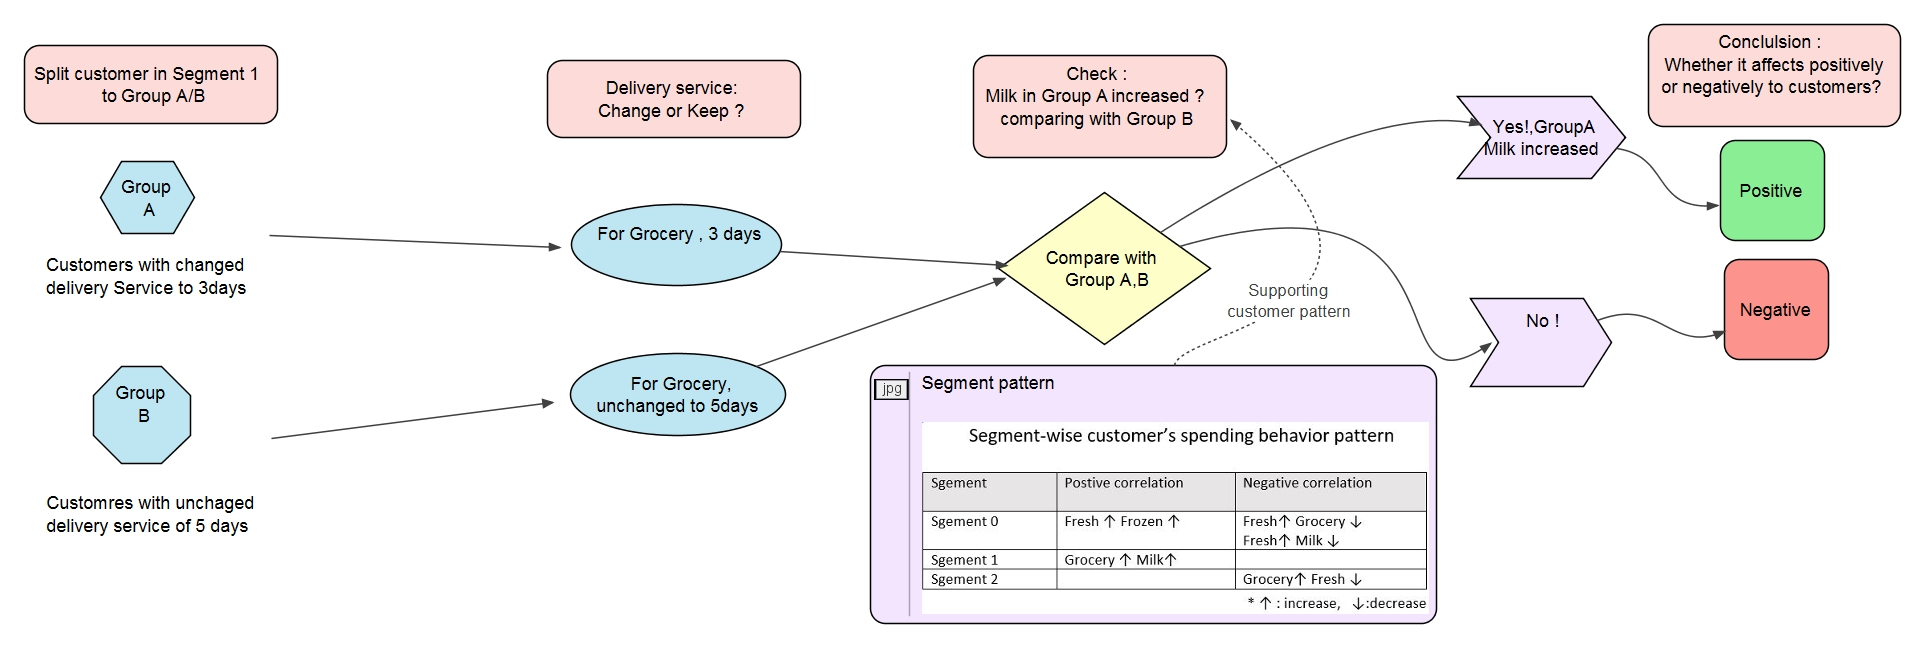

In [426]:
Image("q10abtest-copy.jpeg")

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
As we used an unsupervised learning to classify the customer spending behavior pattern for the products without idea of the cluster label for each data point or customer. The problem for this unsupervised learnig is that all of this data is unlabeled and can’t be used to train machine learning programs that depend on supervised learning. 

But with the help of information we learn from clustering, we can use cluster label as customer segmentation. 
In supervised learning, we will predict the outcome of new launched delivery service for the new customers with 7 features(new customer segmentation feature + 6 products feature). And then using A/B test logic as mentioned above, predict outcome as binary 1(postive result) or 0(negative result) as shown in below diagram.


#### Answer : Supervised learning strategy : Double click below image for the detail view !

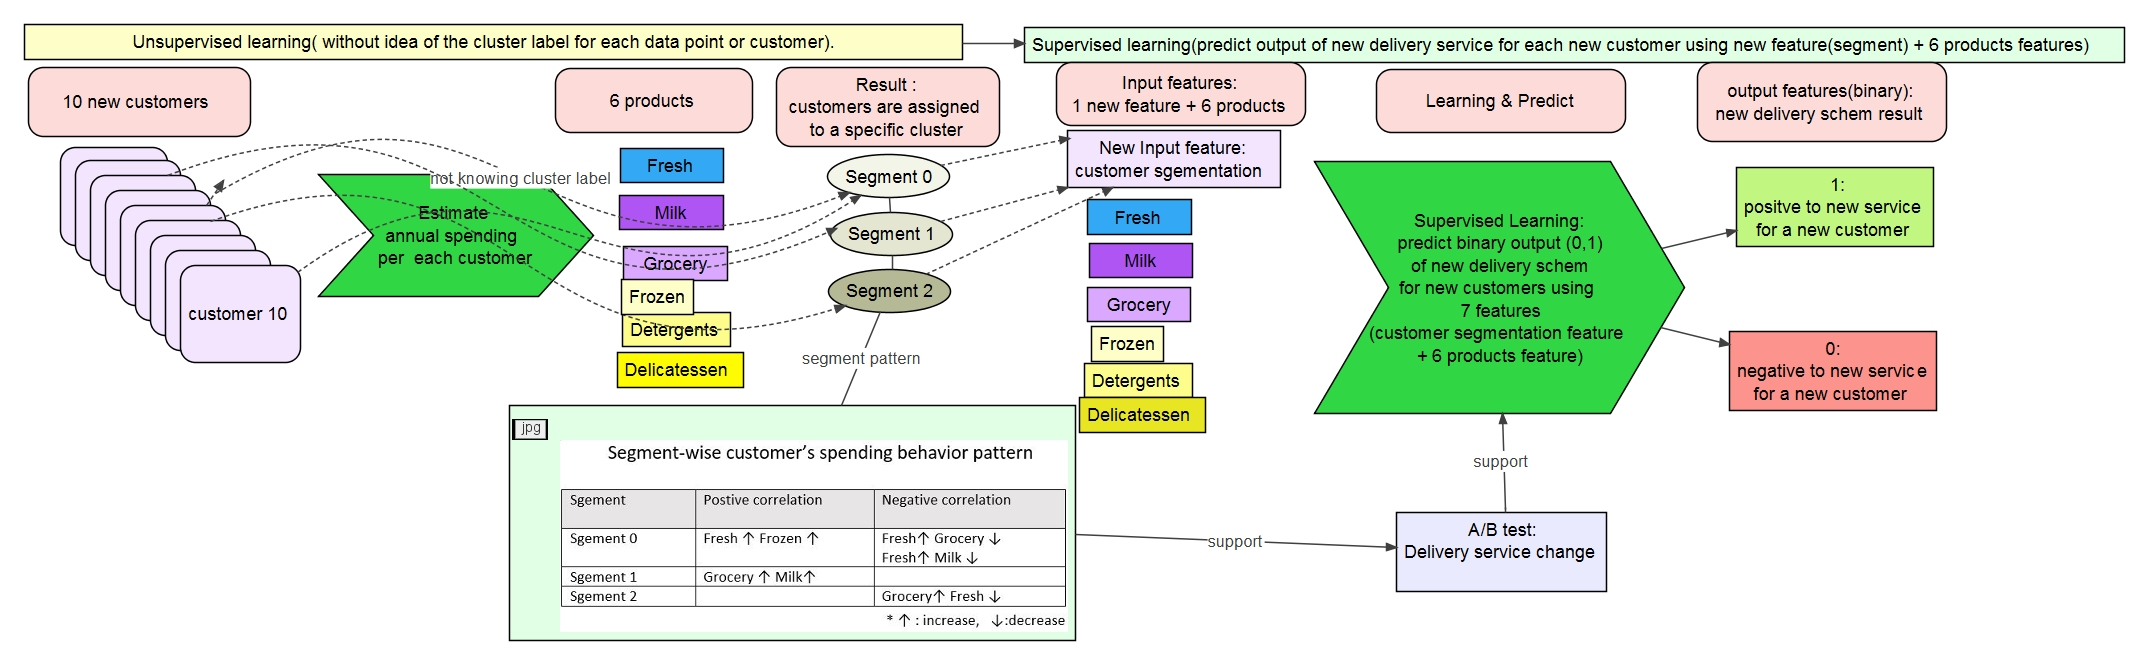

In [427]:
Image("q11.jpeg")

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

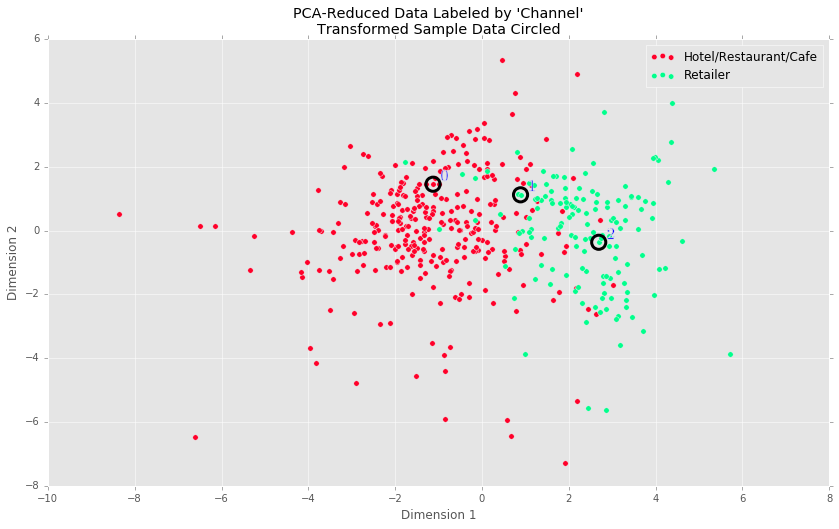

In [184]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm with 3 clusters seems to be much better than this underlying classification since
this cluster HoReCa cluster and Retailer cluster are not clearly classified comparing with the 3 clustering algorithm of my own chosen. 

There are no segments classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution since the two segments are mingled between segments.

These classifications can be regarded as consistent with my previous definition of the customer segment since
as a rule, Hotels/Restaurants/Cafes fall in the segment0, segment 2 and retailers are related with segment 1 as shown below customer purchase pattern graph and chart.

The spending pattern for retailer clusters are similar with that of segment 1 (Much spent on Grocery and Milk. Positive correlationship between these two itmes, and spending much on diverse products).  Hotel/restaurant/cafe segment is similar with that of sgement 0 , 2(Fresh and Frozen positive corelationship, Grocery and Frozen negative correlationship)

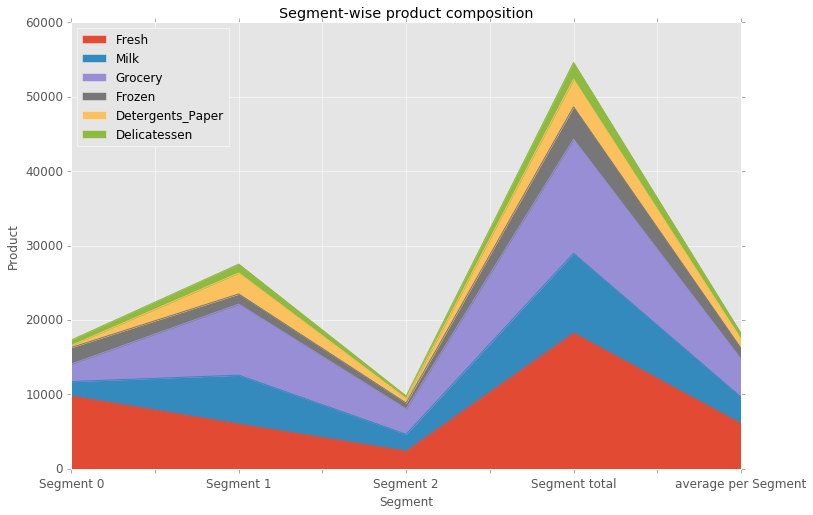

In [185]:
df2 = pd.DataFrame(true_centers_updated[0:5], columns=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])
#df1 = pd.DataFrame(true_centers_updated.loc[['Segment 0','Segment 1','Segment 2','average per Segment'],['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen']])
ax = df2.plot(kind='area', title ="Segment-wise product composition",figsize=(12,8),legend=True, fontsize=12)
#ax = df[['Kmeans','Sigma','GMM']].plot(kind='hist', title ="V comp",figsize=(15,10),legend=True, fontsize=12)
#ax = df[['Kmeans','Sigma','GMM']].plot(kind='area', title ="V comp",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Segment",fontsize=12)
ax.set_ylabel("Product",fontsize=12)
plt.show()

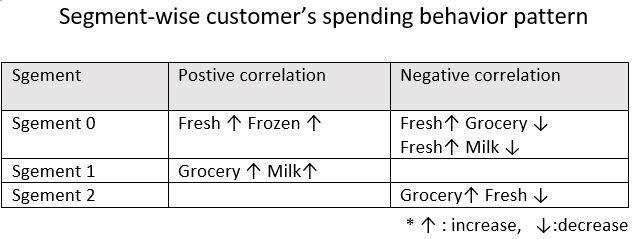

In [186]:
Image("segment.jpg")

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.